In [1]:
from src.init_params import N_ELECTRODES, MATERIAL_ORDER, batch_size, N_PEAKS
from src.represent_cv_sample import DataSample
from src.represent_tea_sample import CompoundDataSample, DataEncodeMode
from src.represent_ms_sample import MSDataSample
from src.preprocess_data import split_dataset, make_data, aug
from src.metrics import calc_metrics
from src.FCN import FCN_Model, train, plot_history, evaluate

In [2]:
from collections import defaultdict, namedtuple
from typing import Tuple, List, Dict, Optional
from pathlib import Path
import numpy as np

## Collect CV data

In [3]:
train_datadir = Path("CV")
data: Dict[Tuple[int], DataSample] = defaultdict(list)
    
for sample_file in train_datadir.glob('*.txt'):
    ds = DataSample(sample_file)
    if ds.target == -1:
        continue
    if ds.metadata.mat == -1:
        continue
    data[ds.key].append(ds)
    
assert all([len(electrodes) == N_ELECTRODES for key, electrodes in data.items()])

## Represent CV characteristic fingerprint

In [4]:
compound_data = [CompoundDataSample(samples) for samples in data.values()]
n_compounds = len(compound_data)
print(f'n = {n_compounds}')

n = 74


In [5]:
cds = CompoundDataSample(list(data.values())[0])
nn = cds.to_nn_sample(mode=DataEncodeMode.SECOND_CYCLE_ONLY, onehot_target=False, vector=True)
print(nn['cycles'].shape, nn['target'])

(400,) 0


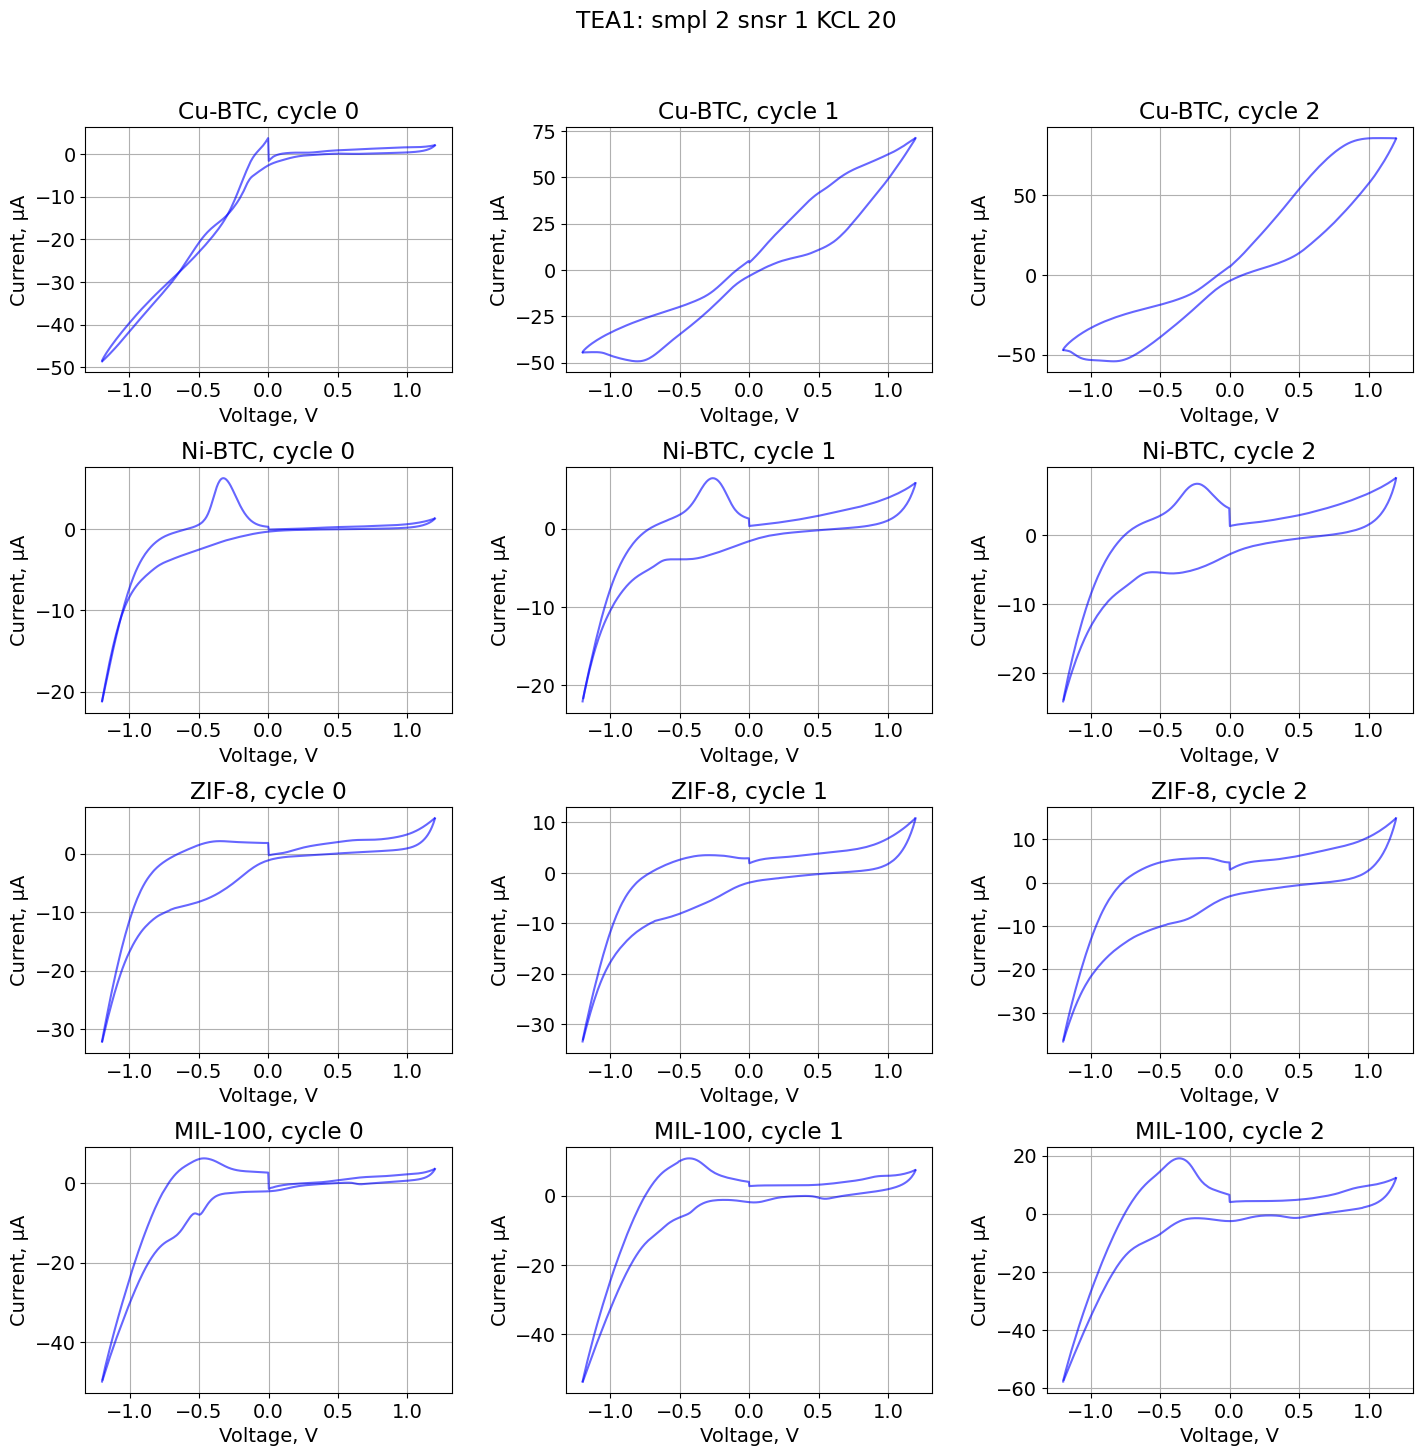

In [6]:
compound_data[17].represent()

In [7]:
compound_data = [CompoundDataSample(samples) for samples in data.values()]
data_train, data_val = split_dataset(compound_data, 0.4)

## Train XGBoost

In [8]:
# import xgboost as xgb

In [9]:
# (X_train, y_train), (X_val, y_val) = make_data(data_train, data_val,
                                               #batch_size=batch_size,
                                               #mode=DataEncodeMode.ALL_CYCLES,
                                               #augmentations=[], 
                                               #vector=True,
                                               #onehot_target=False,
                                               #to_tf=False)

In [10]:
#xgb_cl = xgb.XGBClassifier(objective="multi:softmax", max_depth=20, n_estimators=100)
#xgb_cl.fit(X_train, y_train)

In [11]:
#preds = xgb_cl.predict(X_val)
#calc_metrics(preds, y_val)

### Train FCN on CVs

In [12]:
!del FCN.weights.h5*
all_cycles = Path('FCN.weights.h5') 

Could Not Find C:\Users\IVan\Desktop\Tea_Samples\All\FCN.weights.h5*


In [13]:
mode = DataEncodeMode.ALL_CYCLES #alternatively use FIRST_CYCLE_ONLY or SECOND_CYCLE_ONLY
train_dataset, val_dataset = make_data(data_train, data_val,
                                       batch_size=batch_size,
                                       mode=mode,
                                       augmentations=[aug], 
                                       vector=False,
                                       onehot_target=True,
                                       to_tf=True)

In [14]:
model = FCN_Model(mode=mode,
                                   n_filters_sequence = (8, 16, 32),
                                   kernel_size_sequence = (8, 4, 2),
                                   pool_window_size_sequence = (4, 4, 2))

In [15]:
history = train(all_cycles, model, train_dataset, val_dataset, 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.3133 - loss: 1.6358 - val_categorical_accuracy: 0.2414 - val_loss: 1.6094
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.2296 - loss: 1.5371 - val_categorical_accuracy: 0.2759 - val_loss: 1.6024
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.3506 - loss: 1.5116 - val_categorical_accuracy: 0.2759 - val_loss: 1.5837
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.3467 - loss: 1.4931 - val_categorical_accuracy: 0.2414 - val_loss: 1.5771
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.4637 - loss: 1.4526 - val_categorical_accuracy: 0.2759 - val_loss: 1.5677
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.3405 - loss: 1.4371 - val_categorical_accuracy: 0.1724 - val_loss: 1.5708
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.3694 - loss: 1.4637 - val

Epoch 300/400
6/6 [==============================] - 0s 8ms/step - loss: 0.3606 - categorical_accuracy: 0.8444 - val_loss: 1.6102 - val_categorical_accuracy: 0.5517
Epoch 301/400
6/6 [==============================] - 0s 8ms/step - loss: 0.2763 - categorical_accuracy: 0.8444 - val_loss: 1.4264 - val_categorical_accuracy: 0.5517
Epoch 302/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0397 - categorical_accuracy: 1.0000 - val_loss: 1.3491 - val_categorical_accuracy: 0.5517
Epoch 303/400
6/6 [==============================] - 0s 8ms/step - loss: 0.4296 - categorical_accuracy: 0.8667 - val_loss: 1.2138 - val_categorical_accuracy: 0.6207
Epoch 304/400
6/6 [==============================] - 0s 9ms/step - loss: 0.2138 - categorical_accuracy: 0.9333 - val_loss: 3.4110 - val_categorical_accuracy: 0.4828
Epoch 305/400
6/6 [==============================] - 0s 8ms/step - loss: 0.1120 - categorical_accuracy: 0.9556 - val_loss: 3.2703 - val_categorical_accuracy: 0.5862
Epoch 306/

Epoch 350/400
6/6 [==============================] - 0s 15ms/step - loss: 0.1545 - categorical_accuracy: 0.9333 - val_loss: 1.4712 - val_categorical_accuracy: 0.7931
Epoch 351/400
6/6 [==============================] - 0s 9ms/step - loss: 0.1503 - categorical_accuracy: 0.9556 - val_loss: 1.5200 - val_categorical_accuracy: 0.6897
Epoch 352/400
6/6 [==============================] - 0s 8ms/step - loss: 0.1853 - categorical_accuracy: 0.9111 - val_loss: 2.2090 - val_categorical_accuracy: 0.6552
Epoch 353/400
6/6 [==============================] - 0s 9ms/step - loss: 0.2195 - categorical_accuracy: 0.9333 - val_loss: 1.3623 - val_categorical_accuracy: 0.6552
Epoch 354/400
6/6 [==============================] - 0s 8ms/step - loss: 0.2204 - categorical_accuracy: 0.8889 - val_loss: 2.4274 - val_categorical_accuracy: 0.6207
Epoch 355/400
6/6 [==============================] - 0s 8ms/step - loss: 0.0781 - categorical_accuracy: 0.9778 - val_loss: 2.6327 - val_categorical_accuracy: 0.6207
Epoch 356

In [16]:
#plot_history(history)

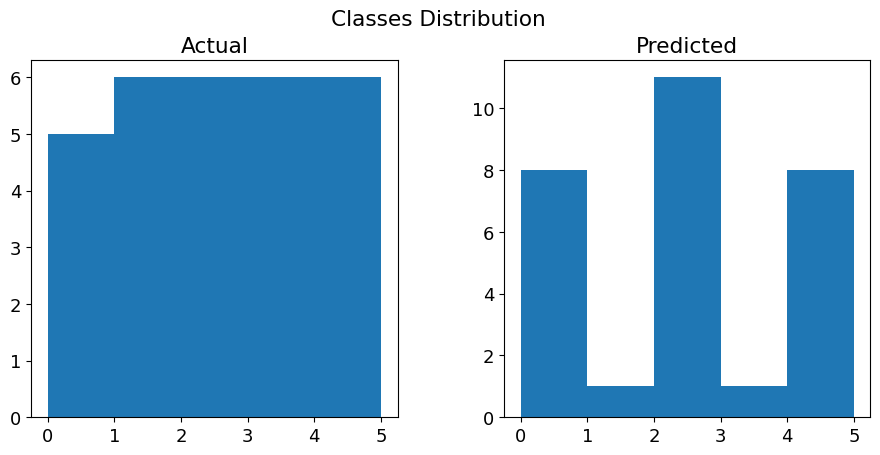

accuracy: 0.4482758620689655


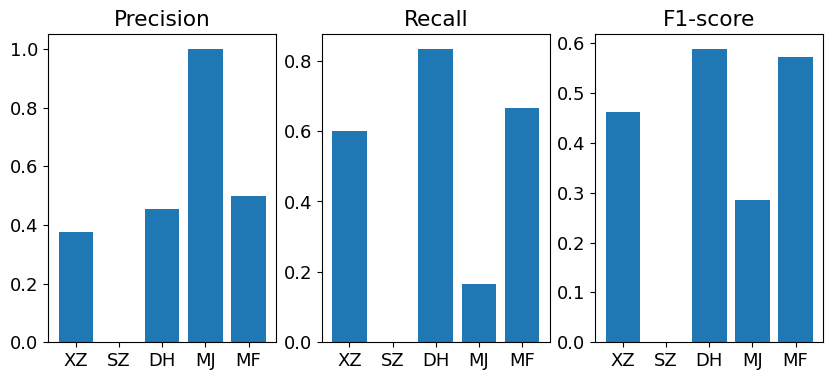

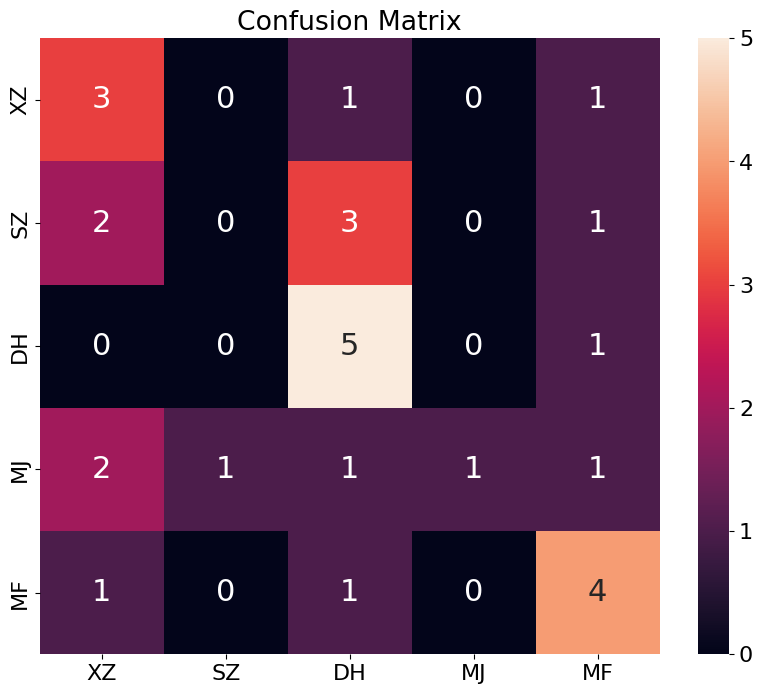

In [17]:
evaluate(model, val_dataset)

# Collect MS data

In [18]:
train_datadir = Path("MS").glob('*.mzXML')
ms_data: List[MSDataSample] = []
for sample_file in train_datadir:
    ds = MSDataSample(sample_file.as_posix())
    ms_data.append(ds)

In [19]:
#ms_data[0].represent()

In [20]:
ms_data_train, ms_data_val = split_dataset(ms_data, 0.4)

In [21]:
print(len(ms_data_train), len(ms_data_val))

75 50


## Train FCN

In [22]:
mode = DataEncodeMode.MS
ms_train_dataset, ms_val_dataset = make_data(ms_data_train, ms_data_val,
                                             batch_size=batch_size,
                                             mode=mode,
                                             augmentations=[], 
                                             vector=False,
                                             onehot_target=True,
                                             to_tf=True,
                                             do_preprocess=False)

In [23]:
model = FCN_Model(mode=DataEncodeMode.MS, 
                                   n_filters_sequence=(8, 16, 32),
                                   kernel_size_sequence=(4, 2, 3),
                                   pool_window_size_sequence=(2, 2, 2),
                                   input_sequence_length=N_PEAKS)

In [24]:
ms_path = Path('ms.weights.h5')

In [25]:
history = train(ms_path, model, ms_train_dataset, ms_val_dataset, 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - categorical_accuracy: 0.4016 - loss: 36.7106 - val_categorical_accuracy: 0.2000 - val_loss: 14.5720
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.3941 - loss: 14.1585 - val_categorical_accuracy: 0.2200 - val_loss: 12.2625
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.4531 - loss: 8.3138 - val_categorical_accuracy: 0.3000 - val_loss: 5.1423
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.4228 - loss: 3.1396 - val_categorical_accuracy: 0.2800 - val_loss: 7.5709
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.5105 - loss: 4.5941 - val_categorical_accuracy: 0.2600 - val_loss: 9.7579
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.4591 - loss: 5.0679 - val_categorical_accuracy: 0.4000 - val_loss: 4.9786
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.6420 - lo

In [26]:
#plot_history(history)

In [27]:
#evaluate(model, ms_val_dataset)